In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import shap
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

# Data preparing

In [269]:
data = pd.read_csv('./data/data.csv')

In [270]:
# data['Difference of inflation'] = data['Food Inflation Rate'] - data['Overall Inflation Rate']

Uncomment this code for encoding with binary encoder

In [271]:
# binary_encoder = ce.BinaryEncoder(cols=['Item', 'Area'])
# data=binary_encoder.fit_transform(data)

In [272]:
numerical_columns = ['Food Inflation Rate', 'Raw GDP', 'GDP Growth Rate', 'Item Price Per Tonne',
                     'Overall Inflation Rate', 'Year',
                     ]

In [273]:
data['Difference of inflation'] = data['Food Inflation Rate'] - data['Overall Inflation Rate']
numerical_columns.append('Difference of inflation')

Uncomment this code for encoding with label encoder

In [274]:
label_encoder = LabelEncoder()
data['Item'] = label_encoder.fit_transform(data['Item'])
data['Area'] = label_encoder.fit_transform(data['Area'])
numerical_columns.append('Item')
numerical_columns.append('Area')

C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [275]:
numerical_columns

['Food Inflation Rate',
 'Raw GDP',
 'GDP Growth Rate',
 'Item Price Per Tonne',
 'Overall Inflation Rate',
 'Year',
 'Difference of inflation',
 'Item',
 'Area']

In [276]:
scaler = RobustScaler()

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(ar

In [277]:
data.head()

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation
0,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-1.000000,-0.299190,0.708333,-0.704691
1,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.986667,-0.229156,0.708333,-0.704691
2,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.906667,-0.330420,0.708333,-0.704691
3,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.893333,0.395618,0.708333,-0.704691
4,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.813333,-0.396085,0.708333,-0.704691


# KMeans and dimensionality reduction

In [278]:
pca = PCA(2)

data_pca = pca.fit_transform(data)
data_pca

C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([[ 0.07979987, -1.24697817],
       [ 0.07617205, -1.24037473],
       [ 0.08170355, -1.25006348],
       ...,
       [-1.02308668,  1.21774295],
       [-0.62658774,  0.50164457],
       [-0.53754852,  0.34091324]])

In [279]:
kmeans = KMeans(2)
kmeans.fit(data_pca)
clusters = kmeans.labels_.tolist()

C:\Users\Tamara\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [280]:
label = kmeans.fit_predict(data_pca)

u_labels = np.unique(label)

labels = kmeans.labels_
u_labels

C:\Users\Tamara\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1])

# Visualization of KMeans clustering

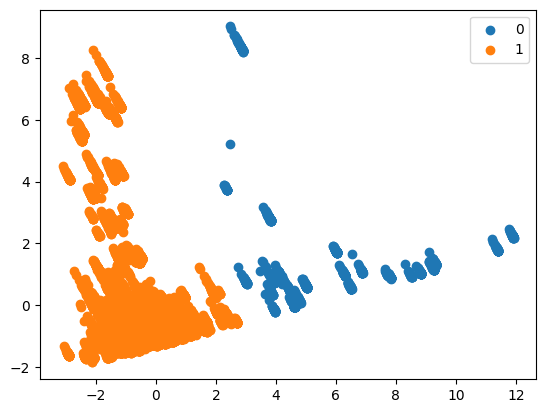

In [281]:
for i in u_labels:
    plt.scatter(data_pca[label == i , 0] , data_pca[label == i , 1] , label = i)
plt.legend()

In [282]:
data['label']=labels

In [283]:
data.head()

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation,label
0,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-1.000000,-0.299190,0.708333,-0.704691,1
1,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.986667,-0.229156,0.708333,-0.704691,1
2,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.906667,-0.330420,0.708333,-0.704691,1
3,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.893333,0.395618,0.708333,-0.704691,1
4,-0.941176,-0.833333,0.160705,-0.422628,-0.784202,-0.813333,-0.396085,0.708333,-0.704691,1


# Model training and evaluation

In [284]:
X, Y = data.drop(columns=['label']), data['label']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [285]:
classifier = RandomForestClassifier(
    n_estimators=3,
    max_depth=2,
    max_features='sqrt',
    random_state=42
)
classifier.fit(x_train, y_train)

C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_d

RandomForestClassifier(max_depth=2, n_estimators=3, random_state=42)

In [286]:
y_pred = classifier.predict(x_test)

C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [287]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00      2917

    accuracy                           1.00      3130
   macro avg       1.00      1.00      1.00      3130
weighted avg       1.00      1.00      1.00      3130



C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [288]:
data[numerical_columns].head()

,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item Price Per Tonne,Overall Inflation Rate,Year,Difference of inflation,Item,Area
0,0.160705,-0.422628,-0.784202,-0.299190,0.708333,-0.833333,-0.704691,-1.000000,-0.941176
1,0.160705,-0.422628,-0.784202,-0.229156,0.708333,-0.833333,-0.704691,-0.986667,-0.941176
2,0.160705,-0.422628,-0.784202,-0.330420,0.708333,-0.833333,-0.704691,-0.906667,-0.941176
3,0.160705,-0.422628,-0.784202,0.395618,0.708333,-0.833333,-0.704691,-0.893333,-0.941176
4,0.160705,-0.422628,-0.784202,-0.396085,0.708333,-0.833333,-0.704691,-0.813333,-0.941176


In [289]:
data[numerical_columns] = scaler.inverse_transform(data[numerical_columns])

C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Tamara\venv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [290]:
data.head()

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation,label
0,0.0,2012.0,2.404087,12319.779604,-4.430218,2.0,369.7,3.2,-0.795913,1
1,0.0,2012.0,2.404087,12319.779604,-4.430218,3.0,489.9,3.2,-0.795913,1
2,0.0,2012.0,2.404087,12319.779604,-4.430218,9.0,316.1,3.2,-0.795913,1
3,0.0,2012.0,2.404087,12319.779604,-4.430218,10.0,1562.2,3.2,-0.795913,1
4,0.0,2012.0,2.404087,12319.779604,-4.430218,16.0,203.4,3.2,-0.795913,1


Uncomment this code for inverse transform with label encoder

In [291]:
# data['Area'] = data['Area'].astype(int)
# data['Area'] = label_encoder.inverse_transform(data['Area'])

Most occurrences of food fraud
Works with inversed values from label encoder

In [292]:
# data.groupby(['Area', 'Year'])['label'].sum()

In [293]:
data.head()

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate,Difference of inflation,label
0,0.0,2012.0,2.404087,12319.779604,-4.430218,2.0,369.7,3.2,-0.795913,1
1,0.0,2012.0,2.404087,12319.779604,-4.430218,3.0,489.9,3.2,-0.795913,1
2,0.0,2012.0,2.404087,12319.779604,-4.430218,9.0,316.1,3.2,-0.795913,1
3,0.0,2012.0,2.404087,12319.779604,-4.430218,10.0,1562.2,3.2,-0.795913,1
4,0.0,2012.0,2.404087,12319.779604,-4.430218,16.0,203.4,3.2,-0.795913,1


# SHAP explainability

In [294]:
explainer = shap.Explainer(classifier)

shap_values = explainer(x_test)

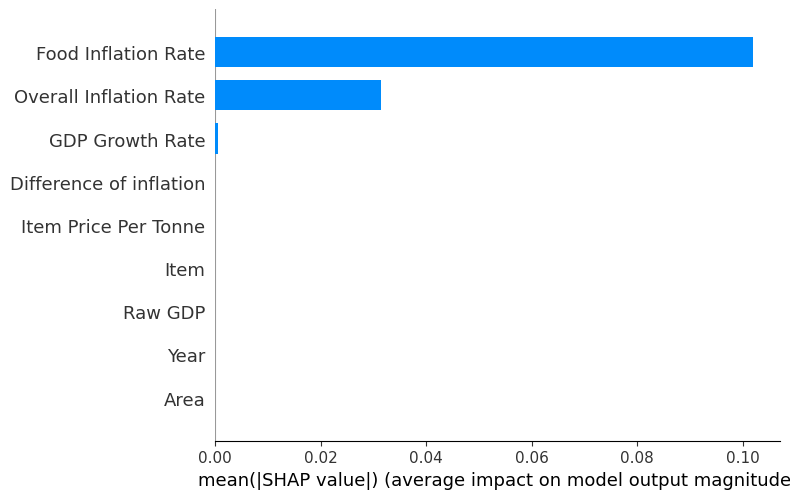

In [295]:
shap.summary_plot(shap_values[:, :, 1], x_test, plot_type="bar")

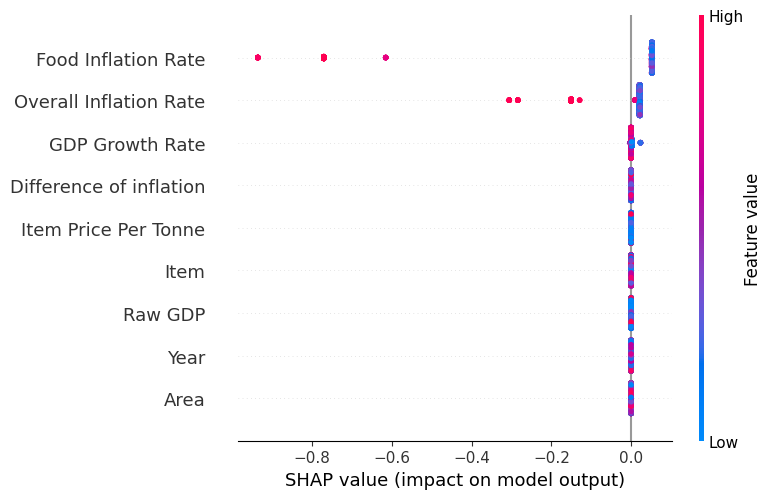

In [296]:
shap.summary_plot(shap_values[:, :, 1], x_test)

In [297]:
shap_values_array = shap_values.values
feature_names = x_train.columns
shap.dependence_plot('Overall Inflation Rate', shap_values_array, x_train,feature_names=feature_names)

IndexError: index 9734 is out of bounds for axis 0 with size 3130

In [ ]:
shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], x_train.iloc[0])